In [2]:
from dypac import Dypac
from dypac.bascpp import stab_maps
import numpy as np
import matplotlib.pyplot as plt
from nilearn.input_data import NiftiMasker
from nilearn import plotting
from cneuromod_embeddings.dypac_utils import get_root_data, load_dypac, load_r2_intra, load_r2_inter, load_r2_other, mean_r2, mean_inter_r2

# Model

In [3]:
subject = 'sub-01'
fwhm = '5'
cluster = 300
state = 900
root_data = get_root_data('friends-s01')
model, mask_img = load_dypac(subject=subject, root_data=root_data, fwhm=fwhm, cluster=cluster, state=state)

# intra subject

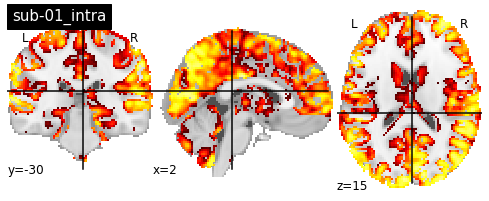

In [5]:
hdf5_file = load_r2_intra(subject=subject, root_data=root_data, fwhm=fwhm, cluster=cluster, state=state)
r2_intra = mean_r2(hdf5_file['validation'], ref_img=mask_img)
plotting.plot_stat_map(r2_intra, cut_coords=[2, -30, 15], display_mode='ortho', 
        threshold=0.1, vmax=1, title=f'r2_{subject}_intra', colorbar=False)

# Inter-subject

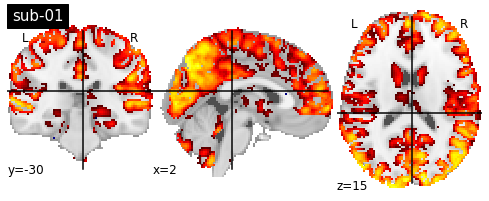

In [13]:
hdf5_file = load_r2_inter(subject=subject, root_data=root_data, fwhm=fwhm, cluster=cluster, state=state)
r2_inter = mean_inter_r2(hdf5_file['inter'], ref_img=mask_img)
plotting.plot_stat_map(r2_inter, cut_coords=[2, -30, 15], display_mode='ortho', 
        threshold=0.1, vmax=1, title=f'r2_{subject}_inter', colorbar=False)

## static viewer (all subjects)

# Group atlases

## Schaefer

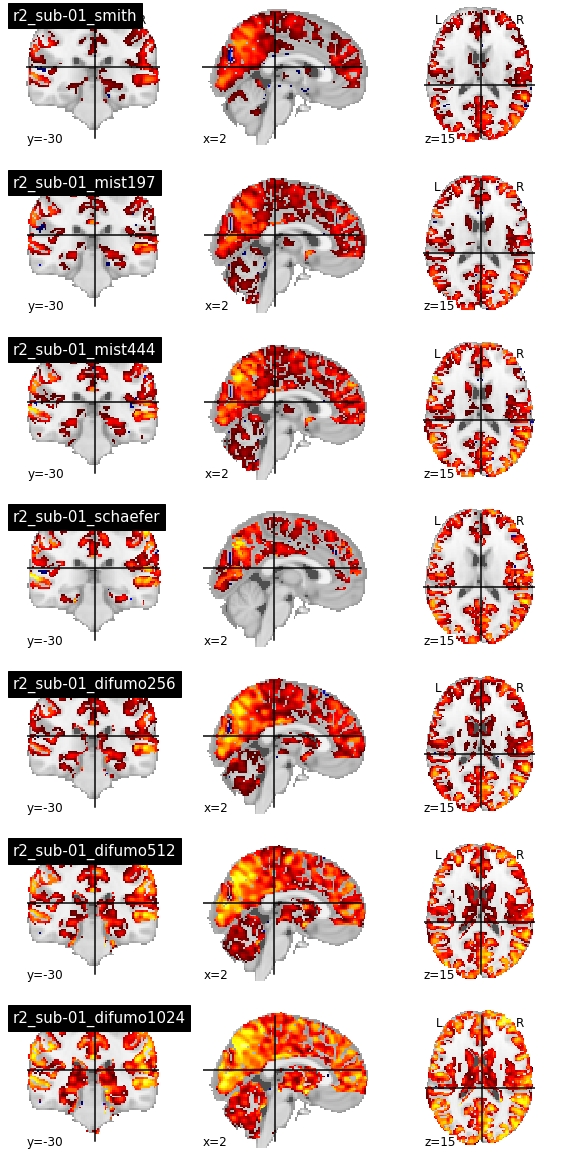

In [9]:
list_atlas = ['smith', 'mist197', 'mist444', 'schaefer', 'difumo256', 'difumo512', 'difumo1024']
n_comp = len(list_atlas)
width_fig = 10
fig = plt.figure(figsize=(width_fig, n_comp*3))

for ind, atlas in enumerate(list_atlas):
    hdf5_file = load_r2_other(atlas=atlas, root_data=root_data, fwhm=fwhm)
    r2_atlas = mean_r2(hdf5_file[subject], ref_img=mask_img)
    plotting.plot_stat_map(r2_atlas, cut_coords=[2, -30, 15], display_mode='ortho', 
            threshold=0.1, vmax=1, title=f'r2_{subject}_{atlas}', colorbar=False, 
            axes=plt.subplot(n_comp, 1, ind+1))